In [1]:
import numpy as np  
import pandas as pd  
import os
import cv2

In [2]:
labels = os.listdir("./Dataset")
labels

['Closed', 'no_yawn', 'Open', 'yawn']

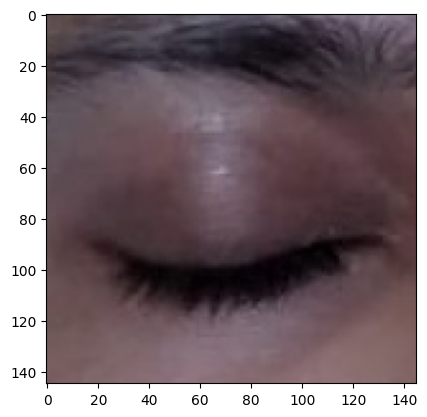

In [3]:
import matplotlib.pyplot as plt
# closeEye
plt.imshow(plt.imread("./Dataset/Closed/_0.jpg"))

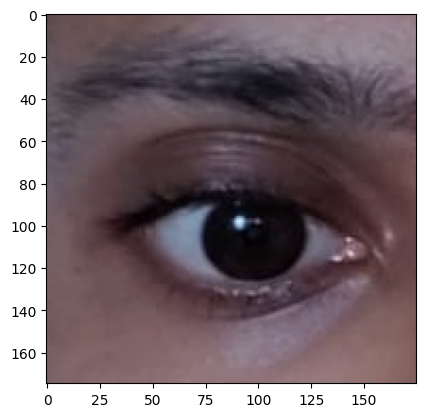

In [4]:
# closeEye
plt.imshow(plt.imread("./Dataset/Open/_0.jpg"))

In [5]:
a = plt.imread("./Dataset/yawn/2.jpg")
a.shape

(480, 640, 3)

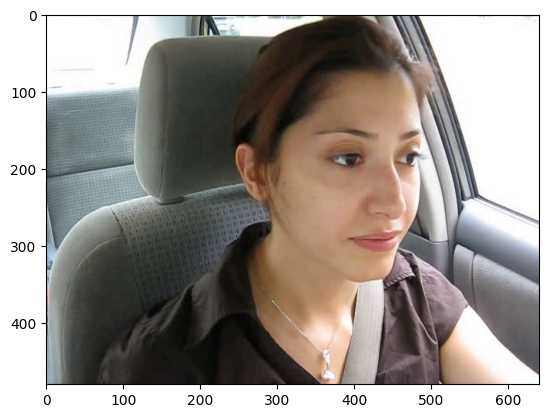

In [6]:
# no yawn
plt.imshow(plt.imread("./Dataset/no_yawn/2.jpg"))

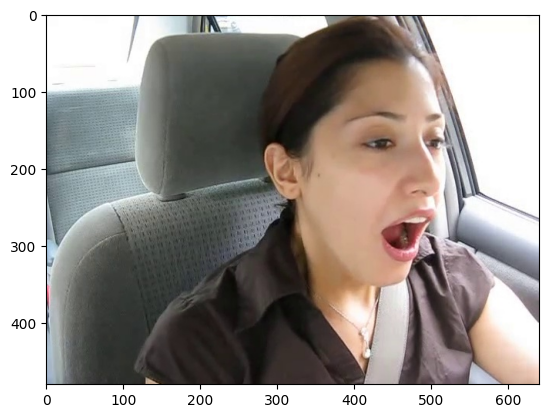

In [7]:
#yawn
plt.imshow(plt.imread("./Dataset/yawn/2.jpg"))

In [8]:
def face_for_yawn(direc="./Dataset", face_cas_path="./archive/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        for image in os.listdir(path_link):
            image_path = os.path.join(path_link, image)
            image_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                roi_color = image_array[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append(resized_array)
                print("Face for yawn shape:", resized_array.shape)
    return yaw_no


In [9]:
def get_data(dir_path="./Dataset"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data_images = []
    data_labels = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label) + 2
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(
                    os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data_images.append(resized_array)
                data_labels.append(class_num)
                print("Get data shape:", resized_array.shape)
            except Exception as e:
                print(e)
    return np.array(data_images), np.array(data_labels)

In [10]:
def append_data():
    yaw_no = face_for_yawn()
    data_images, data_labels = get_data()
    new_data_images = np.concatenate((np.array(yaw_no), data_images), axis=0)
    new_data_labels = np.concatenate(
        (np.zeros(len(yaw_no)), data_labels), axis=0)
    new_data_labels += 1  # Adding 1 to labels to ensure they start from 1
    return new_data_images, new_data_labels

In [11]:
new_data_images, new_data_labels = append_data()

Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: (145, 145, 3)
Face for yawn shape: